In [3]:
import pandas as pd

try:
    df_train = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/train.csv')
    df_validation = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/validation.csv')
    df_test = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/test.csv')
    df_test_labels = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/test_labels.csv')

    print("df_train:")
    display(df_train.head())
    print(df_train.shape)

    print("\ndf_validation:")
    display(df_validation.head())
    print(df_validation.shape)

    print("\ndf_test:")
    display(df_test.head())
    print(df_test.shape)

    print("\ndf_test_labels:")
    display(df_test_labels.head())
    print(df_test_labels.shape)

except FileNotFoundError:
    print("One or more CSV files not found.")
except Exception as e:
    print(f"An error occurred: {e}")

df_train:


,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


(23473, 8)

df_validation:


,id,feedback_text,lang,toxic
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1


(840, 4)

df_test:


,id,content,lang
0,56496,"Bahar merhaba, Şu TV programı için bildiğin gi...",tr
1,18266,"Merhaba, başlık taşıma nedeniyle bir karışıklı...",tr
2,37852,kullanıcı ne mutlu türküm diyene yazmış ta...,tr
3,25075,Quand la plaisanterie sur le synopsis de ce fi...,fr
4,330,Não fosse seu esclarecimento no blog da Anne (...,pt


(6700, 3)

df_test_labels:


,id,toxic
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


(6000, 2)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Shape and Information
print("DataFrame Shapes and Information:")
print("-" * 30)
for df_name, df in zip(["df_train", "df_validation", "df_test", "df_test_labels"],
                      [df_train, df_validation, df_test, df_test_labels]):
    print(f"{df_name}:")
    print(f"Shape: {df.shape}")
    df.info()
    print("-" * 30)


DataFrame Shapes and Information:
------------------------------
df_train:
Shape: (23473, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB
------------------------------
df_validation:
Shape: (840, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             840 non-null    int64 
 1   feedback_text  840 


Target Variable Distribution (df_train):
------------------------------
toxic:
toxic
0    0.906446
1    0.093554
Name: proportion, dtype: float64


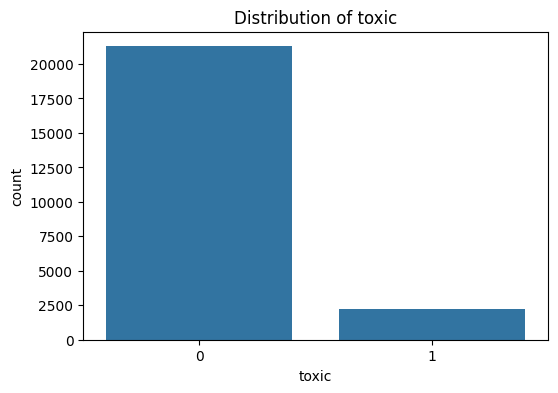

abusive:
abusive
0    0.992502
1    0.007498
Name: proportion, dtype: float64


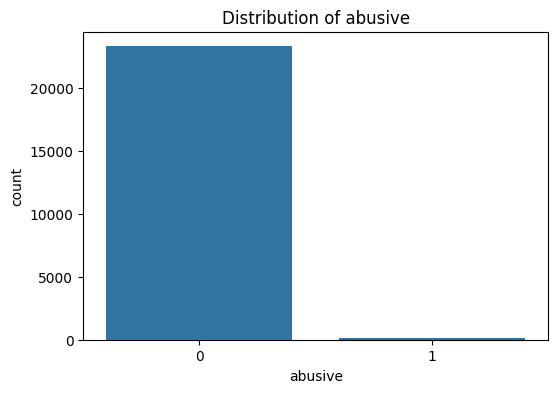

vulgar:
vulgar
0    0.945682
1    0.054318
Name: proportion, dtype: float64


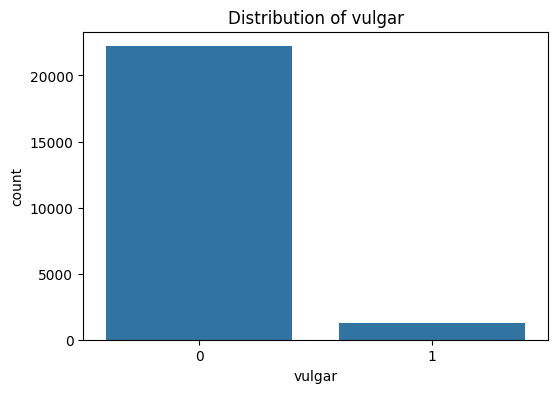

menace:
menace
0    0.997188
1    0.002812
Name: proportion, dtype: float64


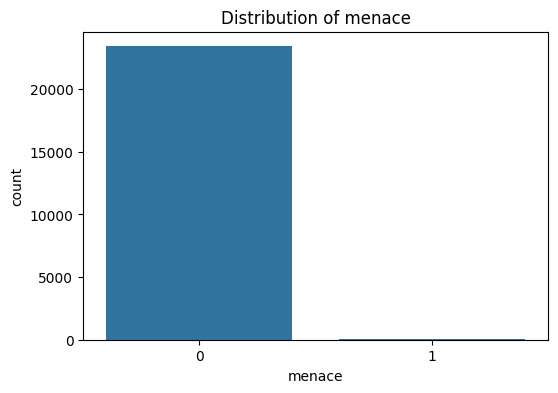

offense:
offense
0    0.951008
1    0.048992
Name: proportion, dtype: float64


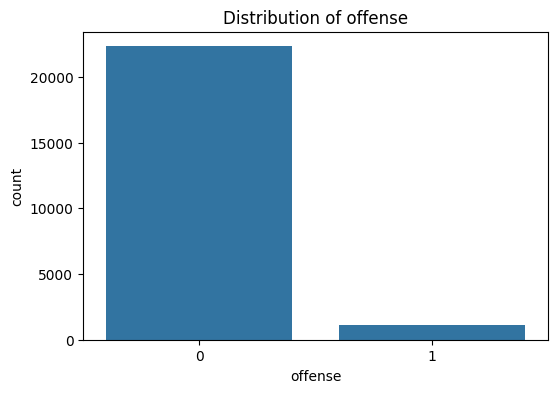

bigotry:
bigotry
0    0.991778
1    0.008222
Name: proportion, dtype: float64


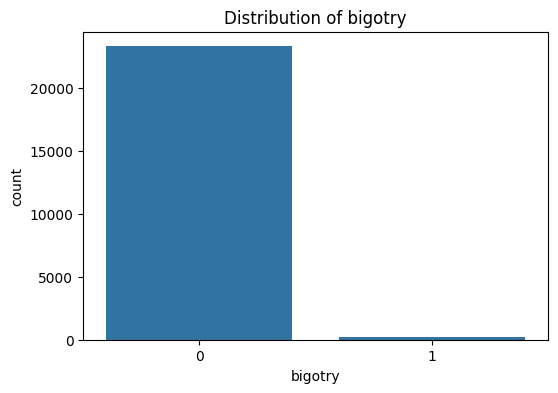

In [5]:
# Target Variable Distribution for df_train
print("\nTarget Variable Distribution (df_train):")
print("-" * 30)
target_cols = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
for col in target_cols:
    print(f"{col}:")
    print(df_train[col].value_counts(normalize=True))
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df_train)
    plt.title(f"Distribution of {col}")
    plt.show()


Target Variable Distribution (df_validation and df_test_labels):
------------------------------
df_validation:
toxic:
toxic
0    0.840476
1    0.159524
Name: proportion, dtype: float64


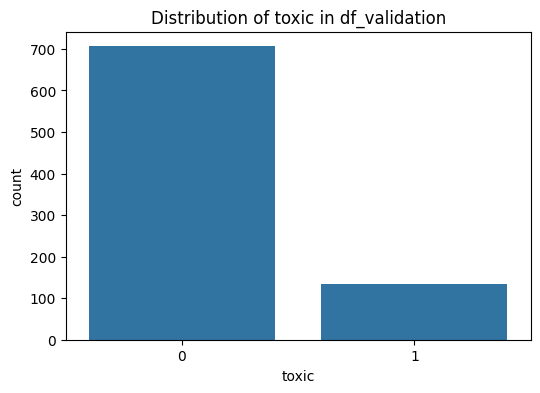

df_test_labels:
toxic:
toxic
0    0.772833
1    0.227167
Name: proportion, dtype: float64


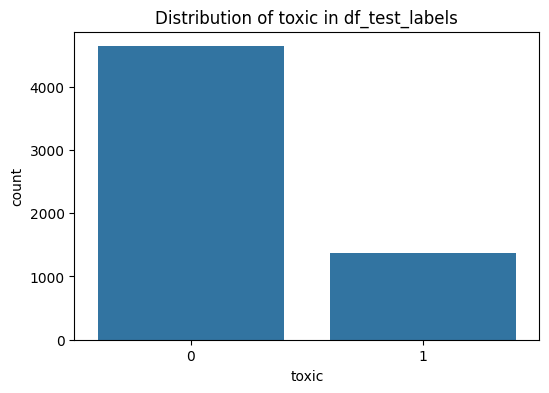

In [6]:
# Target Variable Distribution for df_validation and df_test_labels
print("\nTarget Variable Distribution (df_validation and df_test_labels):")
print("-" * 30)
for df_name, df in zip(["df_validation", "df_test_labels"],
                      [df_validation, df_test_labels]):
    print(f"{df_name}:")
    print(f"toxic:")
    print(df["toxic"].value_counts(normalize=True))
    plt.figure(figsize=(6, 4))
    sns.countplot(x="toxic", data=df)
    plt.title(f"Distribution of toxic in {df_name}")
    plt.show()


Text Data Analysis:
------------------------------
df_train:
Average text length: 402.0297362927619
Minimum text length: 6
Maximum text length: 5000


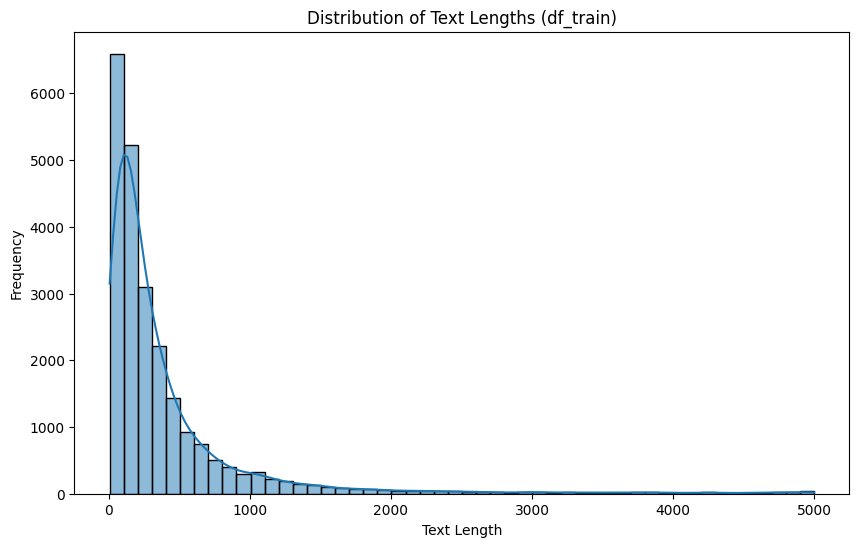

df_validation:
Average text length: 368.30357142857144
Minimum text length: 78
Maximum text length: 1550


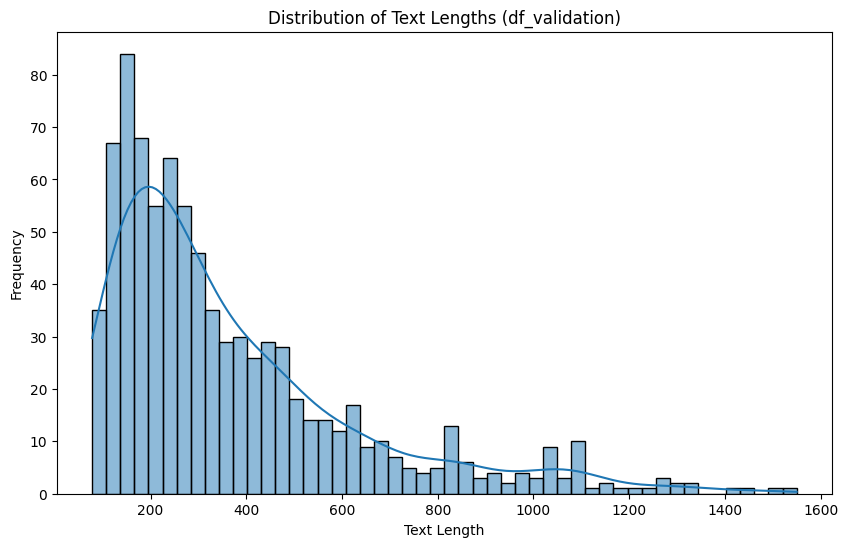

In [7]:
# Text Data Analysis
print("\nText Data Analysis:")
print("-" * 30)
for df_name, df in zip(["df_train", "df_validation"], [df_train, df_validation]):
    print(f"{df_name}:")
    df['text_length'] = df['feedback_text'].str.len()
    print(f"Average text length: {df['text_length'].mean()}")
    print(f"Minimum text length: {df['text_length'].min()}")
    print(f"Maximum text length: {df['text_length'].max()}")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['text_length'], bins=50, kde=True)
    plt.title(f"Distribution of Text Lengths ({df_name})")
    plt.xlabel("Text Length")
    plt.ylabel("Frequency")
    plt.show()


Correlation Analysis (df_train):
------------------------------


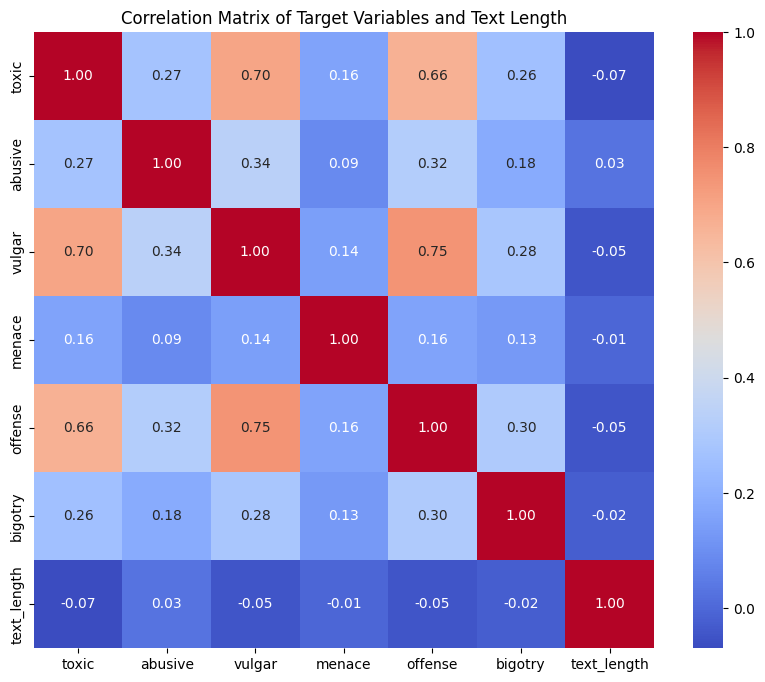

In [8]:
# Correlation Analysis (df_train)
print("\nCorrelation Analysis (df_train):")
print("-" * 30)
plt.figure(figsize=(10,8))
sns.heatmap(df_train[target_cols + ['text_length']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Target Variables and Text Length")
plt.show()

In [9]:
# Missing Values
print("\nMissing Values:")
print("-" * 30)
for df_name, df in zip(["df_train", "df_validation", "df_test", "df_test_labels"],
                      [df_train, df_validation, df_test, df_test_labels]):
    print(f"{df_name}:")
    print(df.isnull().sum())
    print("-" * 30)


Missing Values:
------------------------------
df_train:
id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
text_length      0
dtype: int64
------------------------------
df_validation:
id               0
feedback_text    0
lang             0
toxic            0
text_length      0
dtype: int64
------------------------------
df_test:
id         0
content    0
lang       0
dtype: int64
------------------------------
df_test_labels:
id       0
toxic    0
dtype: int64
------------------------------


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.464015,0.847619,0.179487,0.636364,0.104478
2,No log,0.553518,0.850000,0.192308,0.681818,0.111940
3,No log,0.626671,0.850000,0.171053,0.722222,0.097015



Evaluation Metrics: {'eval_loss': 0.5535175800323486, 'eval_accuracy': 0.85, 'eval_f1': 0.19230769230769232, 'eval_precision': 0.6818181818181818, 'eval_recall': 0.11194029850746269, 'eval_runtime': 11.1053, 'eval_samples_per_second': 75.639, 'eval_steps_per_second': 1.261, 'epoch': 3.0}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       706
           1       0.68      0.11      0.19       134

    accuracy                           0.85       840
   macro avg       0.77      0.55      0.55       840
weighted avg       0.83      0.85      0.80       840



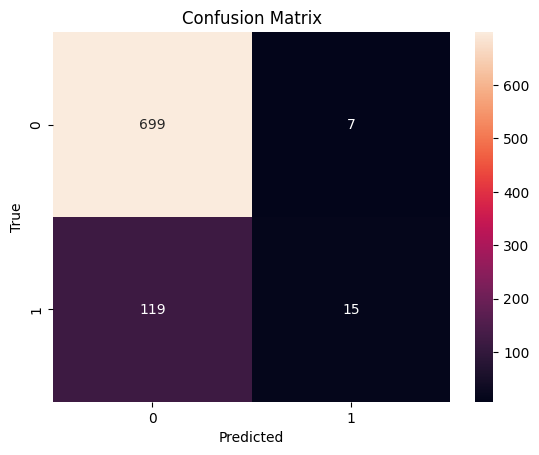

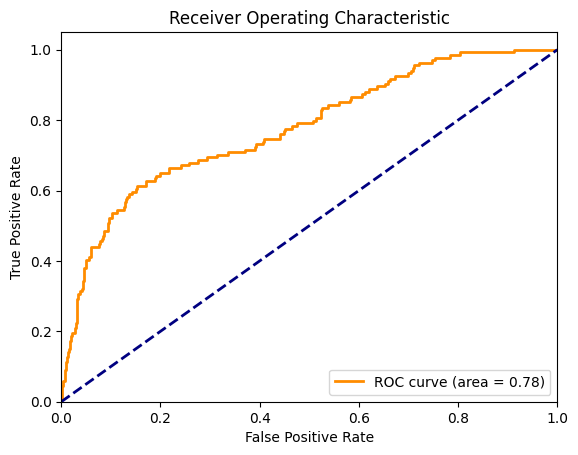

Test predictions saved to 'test_predictions.csv'


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import warnings
warnings.filterwarnings("ignore")
from transformers import TrainingArguments

# Load Data
train_df = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/train.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/validation.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/test.csv')

# Preprocessing
train_df['text'] = train_df['feedback_text'].astype(str)
train_df['label'] = train_df['toxic']

valid_df['text'] = valid_df['feedback_text'].astype(str)
valid_df['label'] = valid_df['toxic']

test_df['text'] = test_df['content'].astype(str)

# Subset for training
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()
valid_texts = valid_df['text'].tolist()
valid_labels = valid_df['label'].tolist()

# Tokenization using multilingual BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=256)

# Dataset Class
class ToxicityDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = ToxicityDataset(train_encodings, train_labels)
valid_dataset = ToxicityDataset(valid_encodings, valid_labels)

# Model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=2)


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Must match evaluation_strategy
    logging_strategy="no",  # No logging
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,      # Prevent HuggingFace Hub access
    report_to="none"        # 👈 disables WandB, TensorBoard, etc.
)



# Compute Metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
)

# Train Model
trainer.train()

# Evaluate
eval_result = trainer.evaluate()
print("\nEvaluation Metrics:", eval_result)

# Predict on Validation
preds = trainer.predict(valid_dataset)
preds_labels = np.argmax(preds.predictions, axis=1)

# Classification Report
print("\nClassification Report:\n", classification_report(valid_labels, preds_labels))

# Confusion Matrix
conf_mat = confusion_matrix(valid_labels, preds_labels)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC
probs = torch.nn.functional.softmax(torch.tensor(preds.predictions), dim=1)[:, 1].numpy()
fpr, tpr, _ = roc_curve(valid_labels, probs)
roc_auc = roc_auc_score(valid_labels, probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict on Test
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings['input_ids'])

test_dataset = TestDataset(test_encodings)
test_preds = trainer.predict(test_dataset)
test_labels = np.argmax(test_preds.predictions, axis=1)

# Output for submission
test_df['predicted_toxic'] = test_labels
test_df[['id', 'predicted_toxic']].to_csv('test_predictions.csv', index=False)
print("Test predictions saved to 'test_predictions.csv'")


In [12]:
import pickle
with open("toxicity_model.pkl", "wb") as f:
    pickle.dump(model, f)